<a href="https://colab.research.google.com/github/haritejaachandu4-boop/SCT_DS_2/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
print("Shape of dataset:", titanic.shape)
print("\nData Types:\n", titanic.dtypes)
print("\nMissing Values:\n", titanic.isnull().sum())

Shape of dataset: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
titanic = titanic.drop(["PassengerId", "Name", "Ticket"], axis=1)

# Fill missing Age with median based on Pclass & Sex
titanic["Age"] = titanic.groupby(["Pclass", "Sex"])["Age"].transform(
    lambda x: x.fillna(x.median()))

In [5]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])

In [6]:
# Extract deck from Cabin (first letter) and fill missing with "Unknown"
titanic["Deck"] = titanic["Cabin"].astype(str).str[0]
titanic["Deck"] = titanic["Deck"].replace("n", "Unknown")
titanic = titanic.drop("Cabin", axis=1)

In [7]:
# Encode categorical variables
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})
titanic = pd.get_dummies(titanic, columns=["Embarked", "Deck"], drop_first=True)

In [8]:
print("\nCleaned Dataset Preview:\n", titanic.head())


Cleaned Dataset Preview:
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0         0       3    0  22.0      1      0   7.2500       False        True   
1         1       1    1  38.0      1      0  71.2833       False       False   
2         1       3    1  26.0      0      0   7.9250       False        True   
3         1       1    1  35.0      1      0  53.1000       False        True   
4         0       3    0  35.0      0      0   8.0500       False        True   

   Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_Unknown  
0   False   False   False   False   False   False   False          True  
1   False    True   False   False   False   False   False         False  
2   False   False   False   False   False   False   False          True  
3   False    True   False   False   False   False   False         False  
4   False   False   False   False   False   False   False          True  


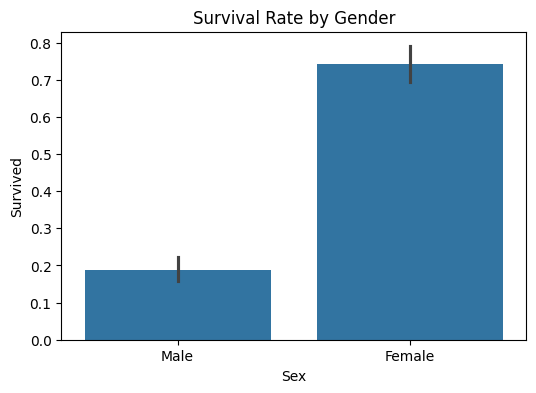

In [9]:
# Survival Rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=titanic)
plt.xticks([0,1], ["Male", "Female"])
plt.title("Survival Rate by Gender")
plt.show()

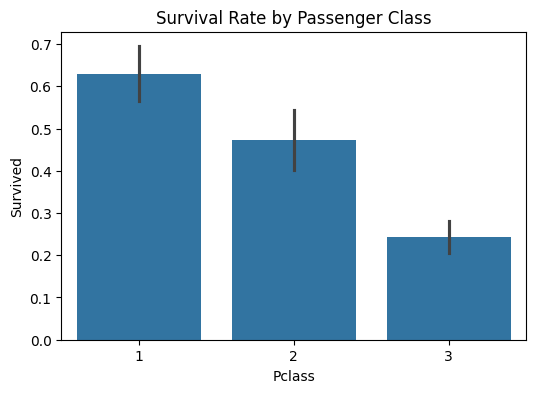

In [10]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=titanic)
plt.title("Survival Rate by Passenger Class")
plt.show()

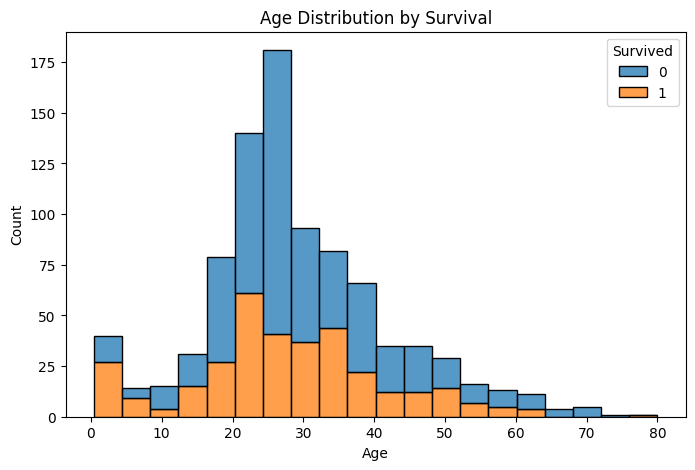

In [11]:
# Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x="Age", hue="Survived", multiple="stack", bins=20)
plt.title("Age Distribution by Survival")
plt.show()

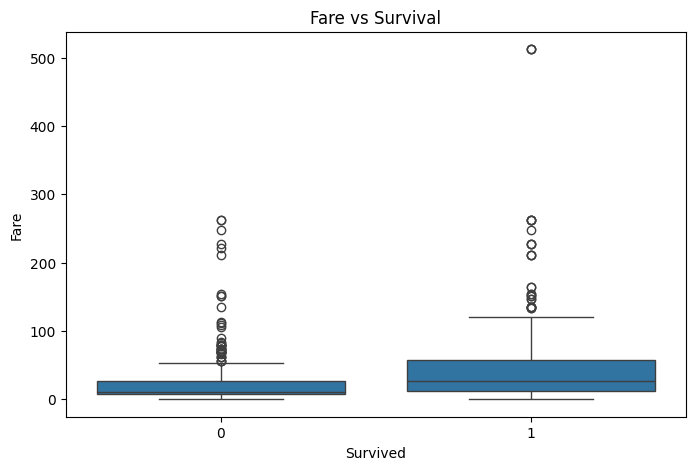

In [12]:
# Fare vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=titanic)
plt.title("Fare vs Survival")
plt.show()

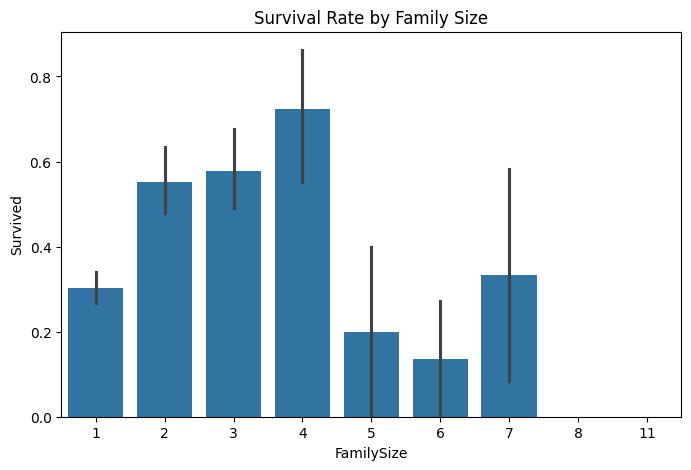

In [13]:
# Family Size Feature
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1
plt.figure(figsize=(8,5))
sns.barplot(x="FamilySize", y="Survived", data=titanic)
plt.title("Survival Rate by Family Size")
plt.show()

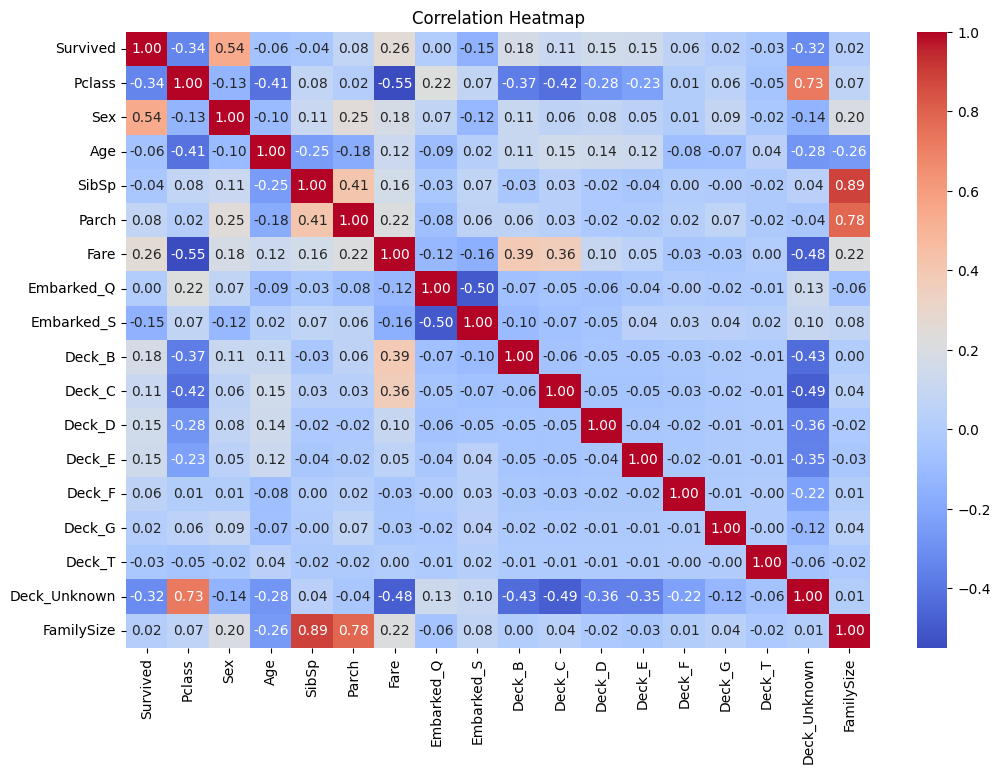

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(
    titanic.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Correlation Heatmap")
plt.show()